<a href="https://colab.research.google.com/github/Sushila-Phogat/CE888/blob/master/Assignment2/adult_data_medium%20balanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load, prepare and inspect the datasets

In [1]:
import pandas as pd

colnames=['age', 'workclass', 'fnlwgt', 'education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary_class'] 
df1=pd.read_csv('https://raw.githubusercontent.com/Sushila-Phogat/CE888/master/Assignment1/data/adult.data', names=colnames, header=None)

df1.head(5)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
#Null value check
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary_class      0
dtype: int64

In [3]:
#NaN value check
df1.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary_class      0
dtype: int64

In [0]:
#Upon looking in deeply in data "?" was there for multiple column so raplacing it with other

df1.replace({'?': 'other', ' ?': 'other','  ?': 'other'}, inplace=True)

In [5]:
df1.replace({' <=50K': 0, ' >50K': 1}, inplace=True)
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [6]:
#Checking imbalance of data with help of Z-score

from statistics import *

clas_mean= df1['salary_class'].mean()
clas_std = df1['salary_class'].std()
df1['z-score'] = (df1['salary_class']-clas_mean)/clas_std
values_plus_minus_one_z_score = len(df1[df1['z-score'].between(-1, 1)==True])
percent_values_plus_minus_one_z_score = values_plus_minus_one_z_score/len(df1)*100
percent_values_plus_minus_one_z_score

75.91904425539757

In [7]:
df1['salary_class'].value_counts()

0    24720
1     7841
Name: salary_class, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


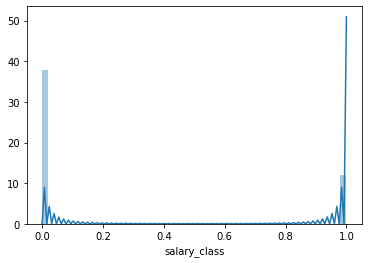

In [8]:
import seaborn as sns

sns.distplot(df1['salary_class'])


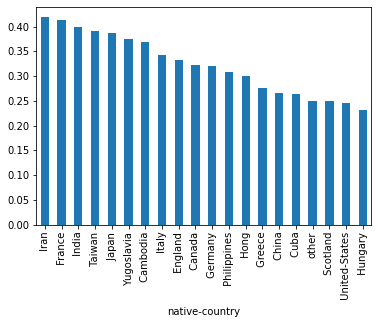

In [9]:
df1.groupby("native-country").salary_class.mean().sort_values(ascending=False)[:20].plot.bar()

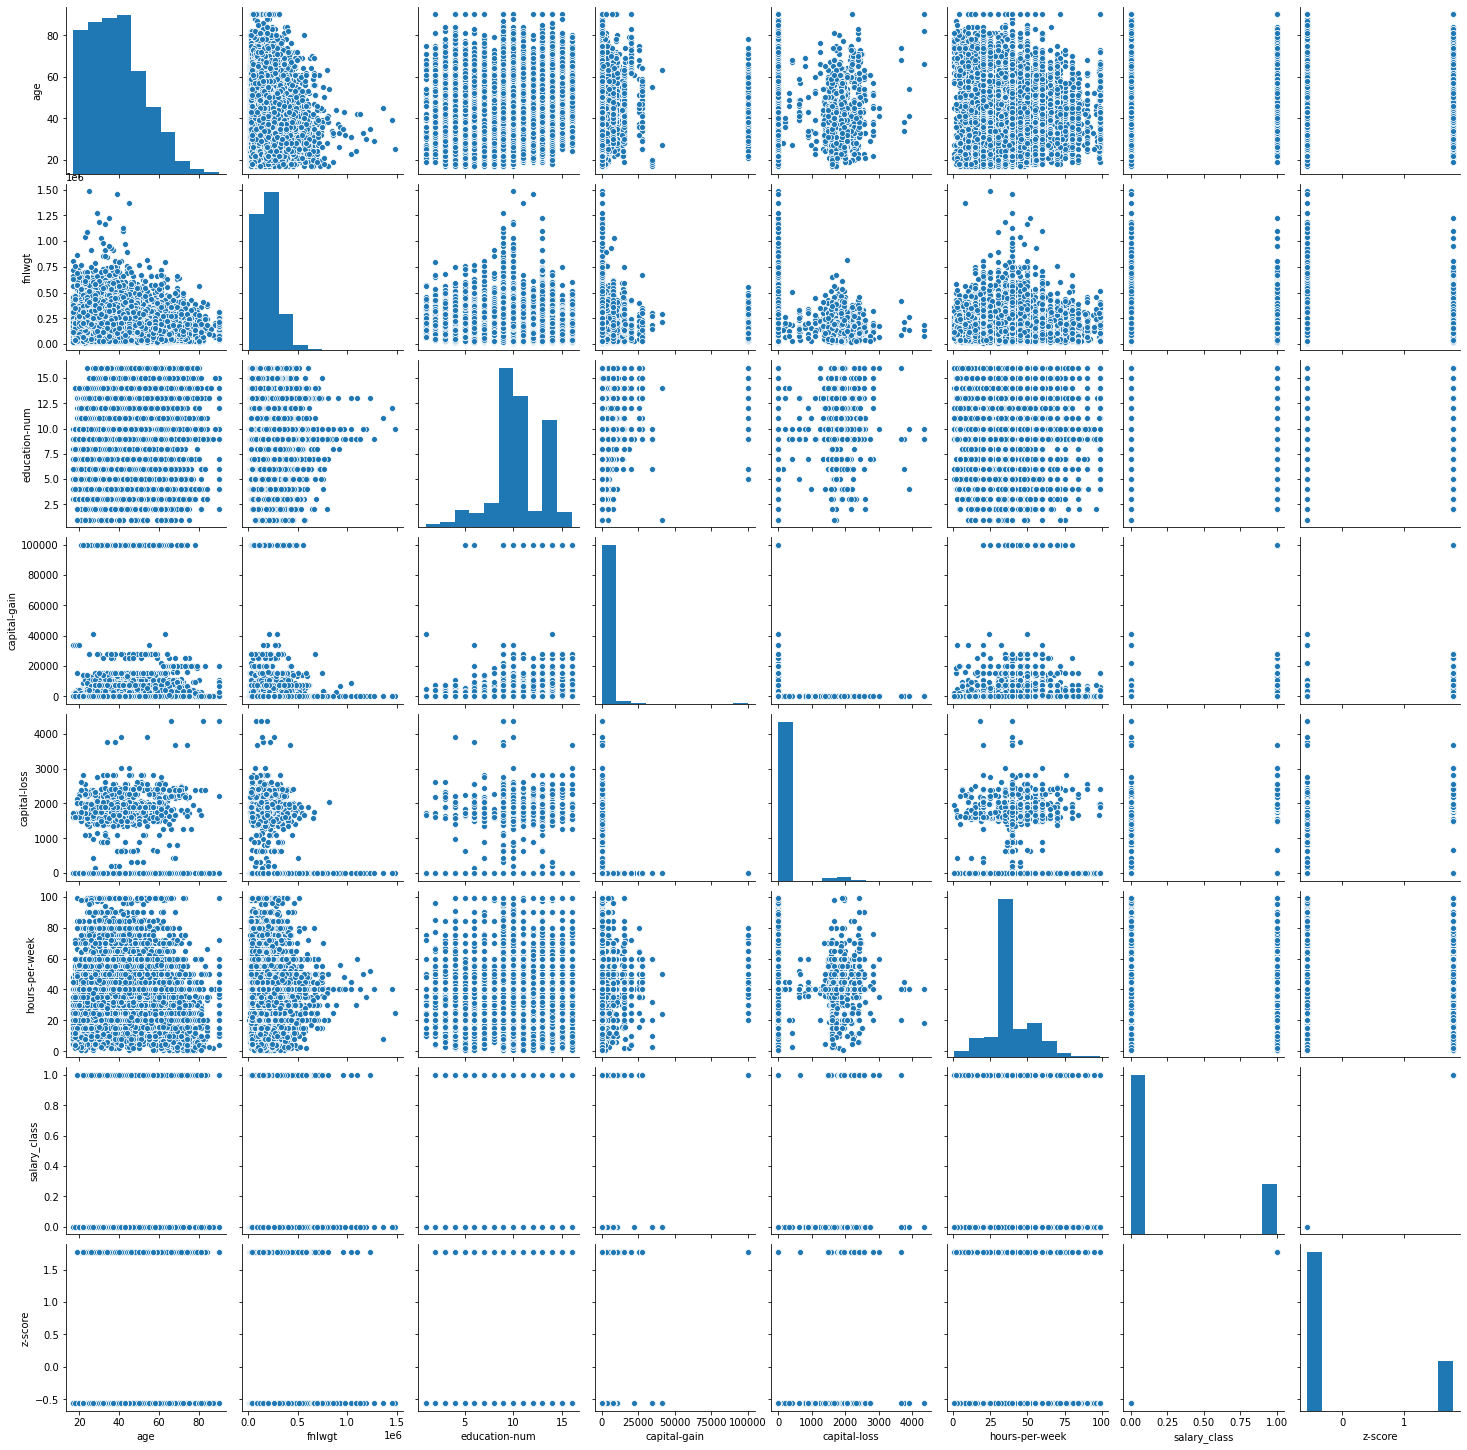

In [10]:
sns.pairplot(df1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f68a3ffd0>,
      dtype=object)

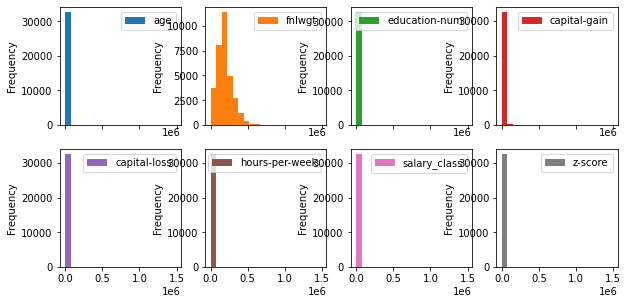

In [11]:
df1.plot.hist(subplots=True, layout=(4,4), figsize=(10, 10), bins=20)

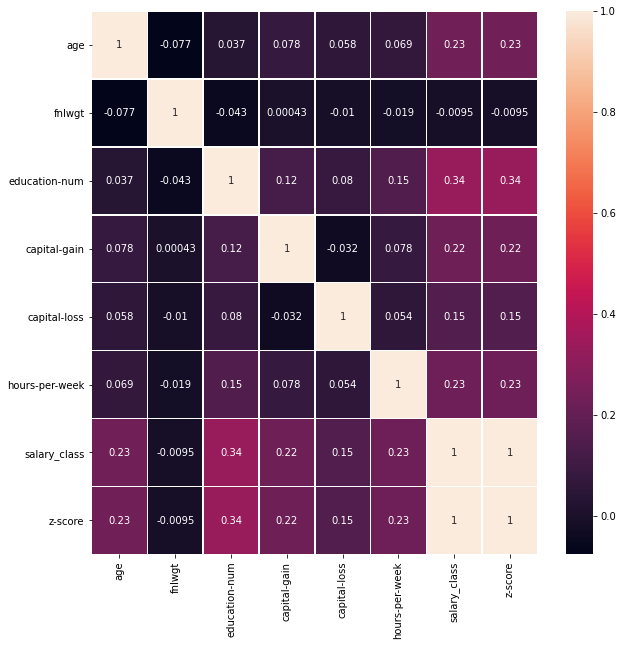

In [12]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

sns.heatmap(df1.corr(), annot=True,linewidths=.7, ax=ax)

In [13]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary_class', 'z-score'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
# convert a string variable to a categorical one
df1[["workclass"]] = df1[["workclass"]].apply(LabelEncoder().fit_transform)
df1[["marital-status"]] = df1[["marital-status"]].apply(LabelEncoder().fit_transform)
df1[["education"]] = df1[["education"]].apply(LabelEncoder().fit_transform)
df1[["occupation"]] = df1[["occupation"]].apply(LabelEncoder().fit_transform)
df1[["relationship"]] = df1[["relationship"]].apply(LabelEncoder().fit_transform)
df1[["race"]] = df1[["race"]].apply(LabelEncoder().fit_transform)
df1[["sex"]] = df1[["sex"]].apply(LabelEncoder().fit_transform)
df1[["native-country"]] = df1[["native-country"]].apply(LabelEncoder().fit_transform)



df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_class,z-score
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0,-0.56319
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,-0.56319
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,-0.56319
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,-0.56319
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,-0.56319


In [0]:
X=df1.iloc[:,1:len(df1.columns)-2]
y=df1.iloc[:,len(df1.columns)-2:len(df1.columns)-1]

# Cross-validation on your dataset using a decision tree 

-- 10-fold cross-validation 
All DT scores: 
{'fit_time': array([0.00802445, 0.00749731, 0.00754333, 0.00733423, 0.00737572,
       0.00732899, 0.00735307, 0.00741649, 0.00789523, 0.00740075]), 'score_time': array([0.00092387, 0.00085378, 0.00082469, 0.00085449, 0.00081921,
       0.00086212, 0.00081897, 0.00084209, 0.00085664, 0.00085306]), 'test_score': array([0.83435583, 0.82822086, 0.8404908 , 0.82949309, 0.83870968,
       0.82642089, 0.83717358, 0.80798771, 0.81259601, 0.83563748])}
Accuracy mean is: 0.82910859178423
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4914
           1       0.76      0.44      0.56      1599

    accuracy                           0.83      6513
   macro avg       0.80      0.70      0.73      6513
weighted avg       0.82      0.83      0.81      6513



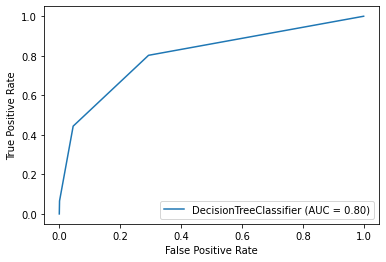

In [16]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report


# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("-- 10-fold cross-validation ")

#Defining Decision Tree
dt_clf = DecisionTreeClassifier(criterion="entropy", random_state=10, max_depth=2, min_samples_leaf=2)

#Training Decision Tree
dt_clf.fit(X_train, y_train)

#Cross Validating using Decision Tree
old_dt_scores =cross_validate(dt_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=dt_clf.predict(X_test)
#Result
print("All DT scores: ")
print(old_dt_scores)
print("Accuracy mean is:", old_dt_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(dt_clf, X_test, y_test.values.ravel())
plt.show() 

# Cross-validation on your dataset using a random forest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


All RF scores: 
{'fit_time': array([0.27617168, 0.25851583, 0.26152492, 0.2569623 , 0.25801349,
       0.25825405, 0.2629838 , 0.25777602, 0.25816417, 0.26317334]), 'score_time': array([0.01141095, 0.01078248, 0.01119614, 0.01079321, 0.01090717,
       0.01080489, 0.01085019, 0.01074934, 0.01147103, 0.01130962]), 'test_score': array([0.80368098, 0.79447853, 0.8006135 , 0.80952381, 0.80184332,
       0.79416283, 0.79723502, 0.79569892, 0.79262673, 0.80337942])}
Accuracy mean is: 0.7993243052217918
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4914
           1       0.99      0.18      0.30      1599

    accuracy                           0.80      6513
   macro avg       0.89      0.59      0.59      6513
weighted avg       0.84      0.80      0.74      6513



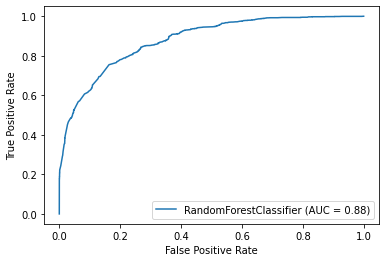

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve


#Defining Random Forest Classifier
rf_clf = RandomForestClassifier(criterion="entropy", random_state=10, max_depth=2, min_samples_leaf=2)

#Training Random Forest Classifier
rf_clf.fit(X_train, y_train)

#Cross Validating Random Forest
old_rf_scores =cross_validate(rf_clf, X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=rf_clf.predict(X_test)
#Result
print("All RF scores: ")
print(old_rf_scores)

print("Accuracy mean is:", old_rf_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))
plot_roc_curve(rf_clf, X_test, y_test.values.ravel())
plt.show() 


#Partition the datasets into 10 bins keeping the imbalance ratio from the original dataset

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Separating o and 1 classes data
df_class0=df1[df1['salary_class']==0]
df_class1=df1[df1['salary_class']==1]

#Countig length of each class data

ln0=int(len(df_class0)/10)
ln1=int(len(df_class1)/10)

init0=0
init1=0

bins=[]

target_count=df1.salary_class.value_counts()

#original Imbalance
orig_imbalance=(target_count[0]/(target_count[1]+target_count[0]))*100
print("Original Imbalance in the dataset: {} %".format(orig_imbalance))

#Creating 10 bins keeping imbalance percentage as original
for i in range(10):
    curr_bin=pd.concat([df_class0.iloc[init0:init0+ln0,:],df_class1.iloc[init1:init1+ln1,:]])
    target_cnt=curr_bin.salary_class.value_counts()
    imbalance=(target_cnt[0]/(target_cnt[0]+target_cnt[1]))*100
    print("Class imbalance ratio in bin {} : {} %".format(i,imbalance))
    bins.append(curr_bin.values)
    init0+=ln0
    init1+=ln1


# Preprocessing 9 Bins data as X_train and curr_bin as X_test
bin9=np.vstack((bins[j] for j in range(10) if j!=i )) #combining 9 bins data
data=pd.DataFrame(bin9)
data.columns=df1.columns

X_train=data.iloc[:,1:len(data)-2]
y_train=data.iloc[:,len(data)-2:len(data)-1]
X_test=curr_bin.iloc[:,1:len(data)-2]
y_test=curr_bin.iloc[:,len(data)-2:len(data)-1]

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

Original Imbalance in the dataset: 75.91904425539757 %
Class imbalance ratio in bin 0 : 75.92137592137593 %
Class imbalance ratio in bin 1 : 75.92137592137593 %
Class imbalance ratio in bin 2 : 75.92137592137593 %
Class imbalance ratio in bin 3 : 75.92137592137593 %
Class imbalance ratio in bin 4 : 75.92137592137593 %
Class imbalance ratio in bin 5 : 75.92137592137593 %
Class imbalance ratio in bin 6 : 75.92137592137593 %
Class imbalance ratio in bin 7 : 75.92137592137593 %
Class imbalance ratio in bin 8 : 75.92137592137593 %
Class imbalance ratio in bin 9 : 75.92137592137593 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


#Using the Elbow method and the Silhouette method, identify the number of clusters in the dataset.

silhouette 2th score:0.535635 
Distortion or average SSE for 2th cluster is:1.265296 
silhouette 3th score:0.501369 
Distortion or average SSE for 3th cluster is:0.897218 
silhouette 4th score:0.494406 
Distortion or average SSE for 4th cluster is:0.791559 
silhouette 5th score:0.516284 
Distortion or average SSE for 5th cluster is:0.720882 
silhouette 6th score:0.475905 
Distortion or average SSE for 6th cluster is:0.629418 
silhouette 7th score:0.497916 
Distortion or average SSE for 7th cluster is:0.576747 
silhouette 8th score:0.451594 
Distortion or average SSE for 8th cluster is:0.550098 
silhouette 9th score:0.410027 
Distortion or average SSE for 9th cluster is:0.511983 
silhouette 10th score:0.400906 
Distortion or average SSE for 10th cluster is:0.499718 
silhouette 11th score:0.403234 
Distortion or average SSE for 11th cluster is:0.479635 
silhouette 12th score:0.394858 
Distortion or average SSE for 12th cluster is:0.449782 
silhouette 13th score:0.402959 
Distortion or av

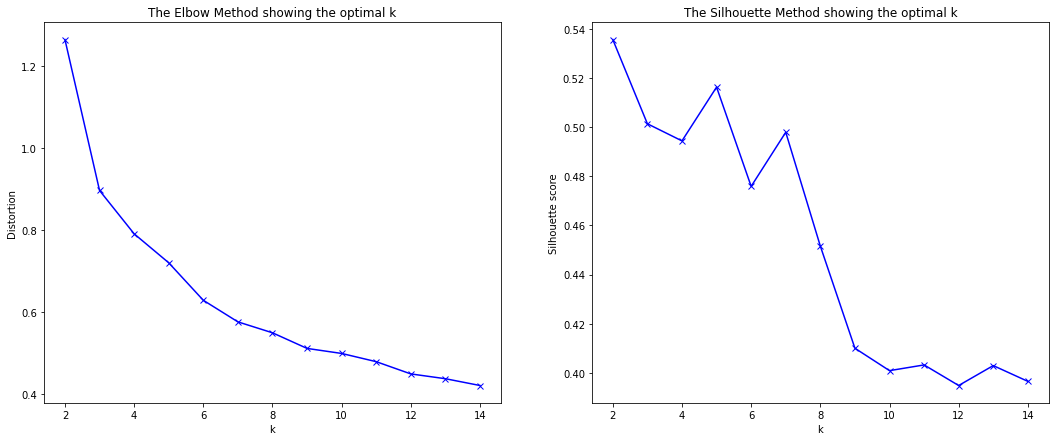

In [19]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
silhouette_scores=[]
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train_pca)
    kmeanModel.fit(X_train_pca)
    labels = kmeanModel.labels_
    silhouette_score=metrics.silhouette_score(X_train_pca, labels, metric='euclidean')
    silhouette_scores.append(silhouette_score)
    print("silhouette %dth score:%f "%(k, silhouette_score))
    avg_sse=(sum(np.min(cdist(X_train_pca, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train_pca.shape[0])
    distortions.append(avg_sse)
    print("Distortion or average SSE for %dth cluster is:%f "%(k, avg_sse))


# Plot the elbow
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method showing the optimal k')
ax2.plot(K, silhouette_scores, 'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('Silhouette score')
ax2.set_title('The Silhouette Method showing the optimal k')
plt.show()


#Further Analysis on K with Silhouette Method

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5356348682153234
For n_clusters = 3 The average silhouette_score is : 0.5013675488471481
For n_clusters = 4 The average silhouette_score is : 0.4944252783008496
For n_clusters = 5 The average silhouette_score is : 0.5164165939605425
For n_clusters = 6 The average silhouette_score is : 0.47598439916670854
For n_clusters = 7 The average silhouette_score is : 0.49773558186275507
For n_clusters = 8 The average silhouette_score is : 0.45166208945178843
For n_clusters = 9 The average silhouette_score is : 0.41000215885017616
For n_clusters = 10 The average silhouette_score is : 0.4017499693867506


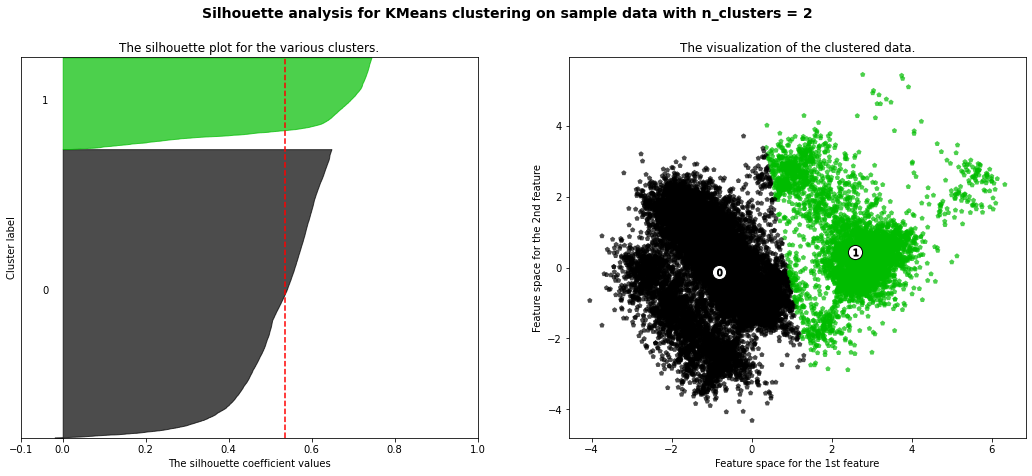

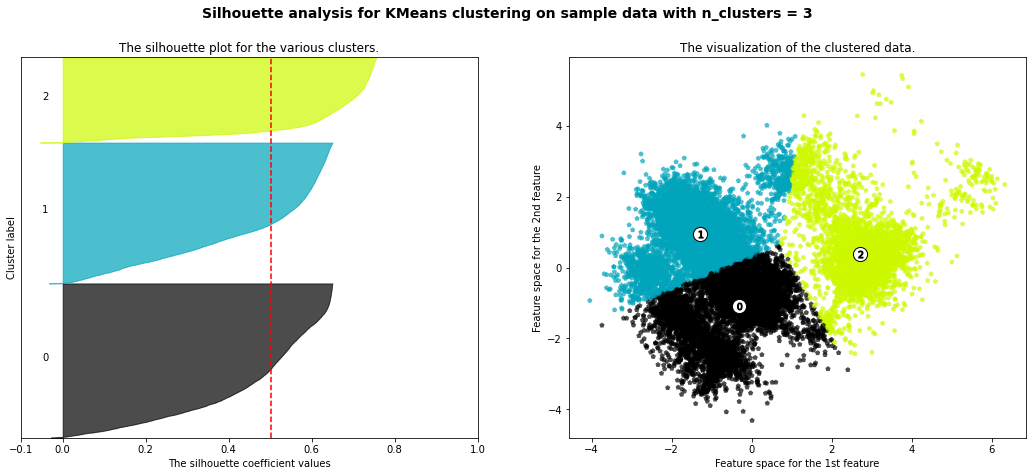

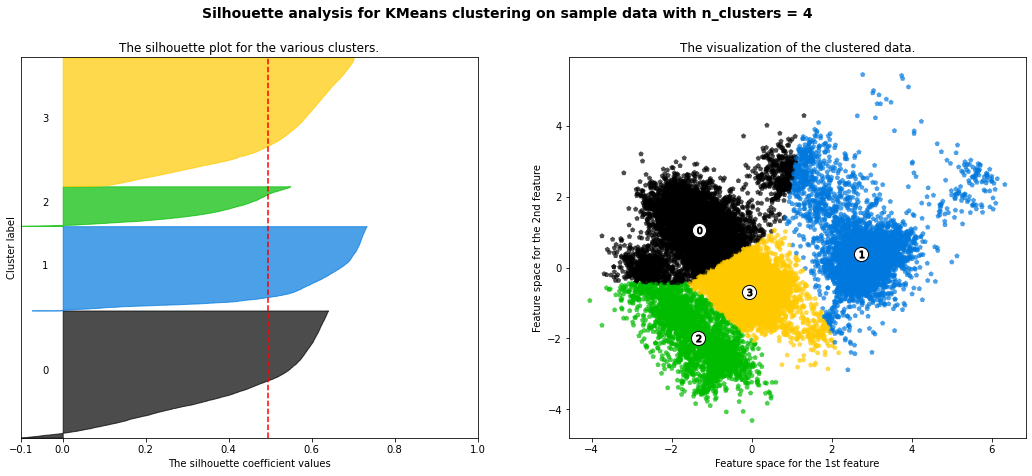

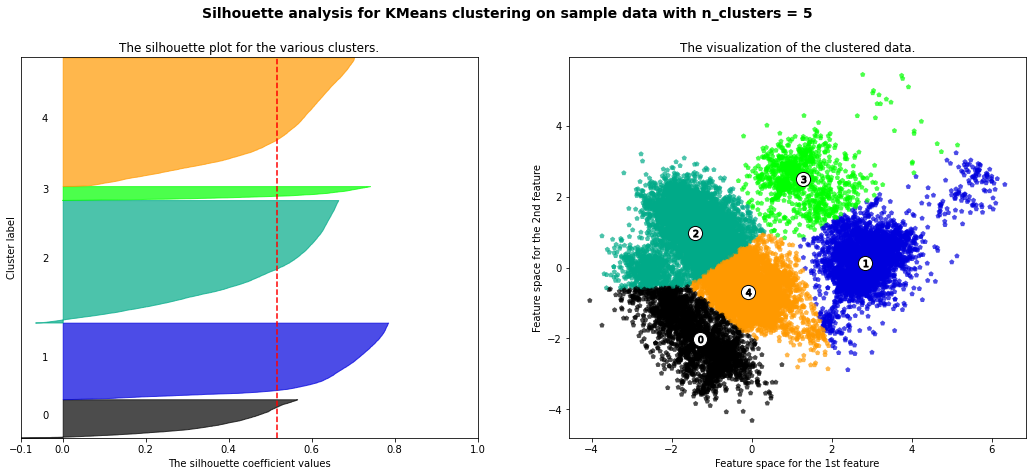

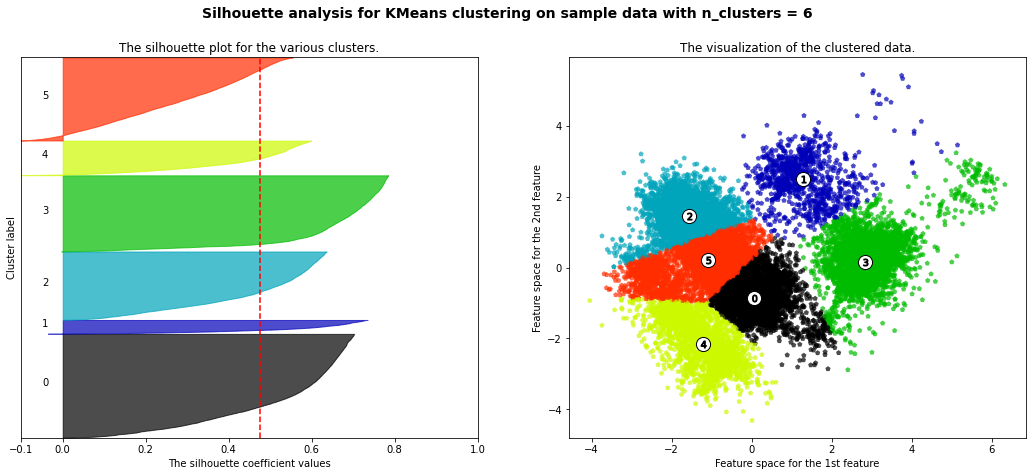

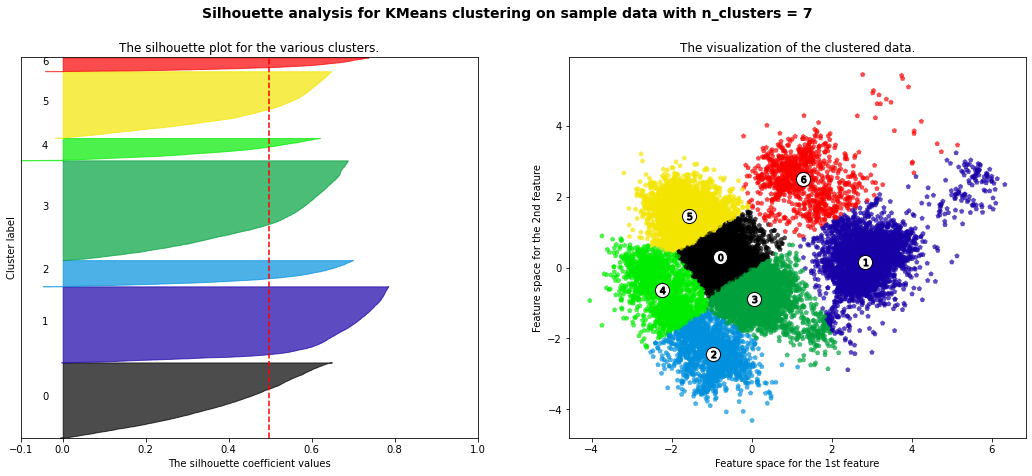

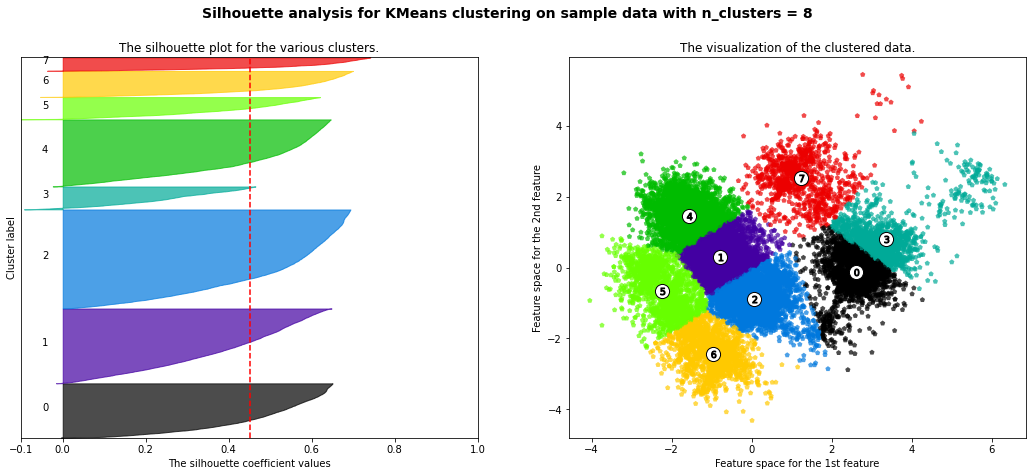

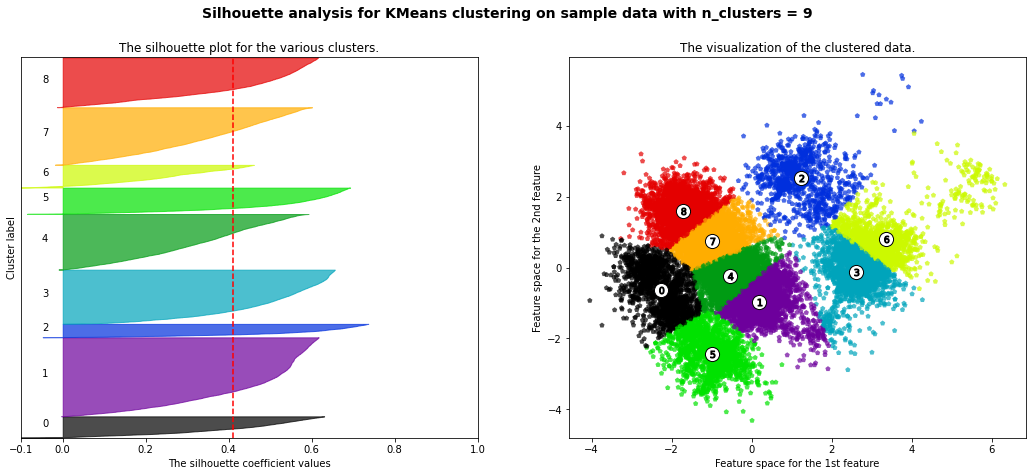

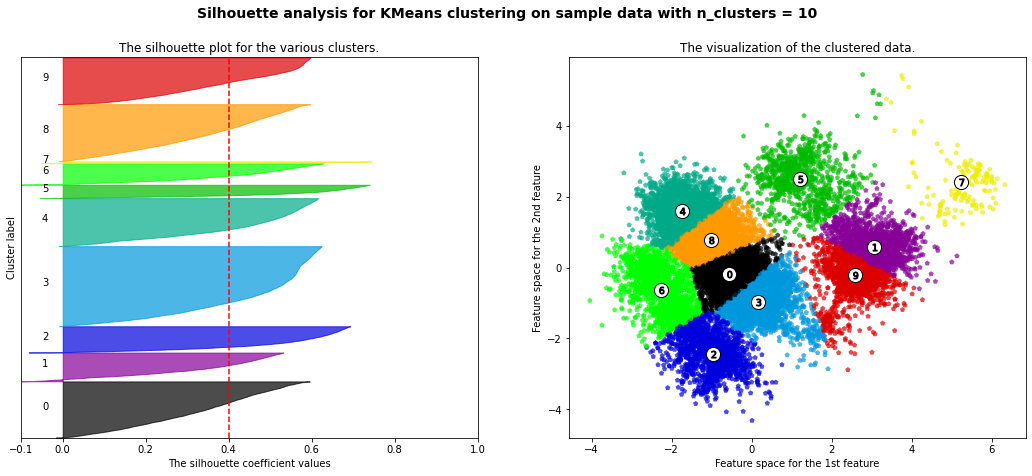

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train_pca[:, 0], X_train_pca[:, 1], marker='p', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#Run k-means in the data set using the identified number of clusters.

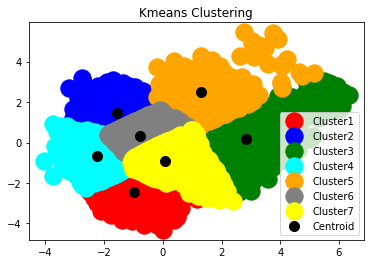

In [21]:


# Implementing the KMeans Algorithm with the optimal no.of Clusters
kmeans = KMeans(n_clusters =7, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train_pca)
cluster_data=data

cols=list(cluster_data.columns)



# Plotting the results
plt.scatter(X_train_pca[y_kmeans == 0, 0], X_train_pca[y_kmeans == 0, 1], s = 300, c = 'red', label = 'Cluster1')
plt.scatter(X_train_pca[y_kmeans == 1, 0], X_train_pca[y_kmeans == 1, 1], s = 300, c = 'blue', label = 'Cluster2')
plt.scatter(X_train_pca[y_kmeans == 2, 0], X_train_pca[y_kmeans == 2, 1], s = 300, c = 'green', label = 'Cluster3')
plt.scatter(X_train_pca[y_kmeans == 3, 0], X_train_pca[y_kmeans == 3, 1], s = 300, c = 'cyan', label = 'Cluster4')
plt.scatter(X_train_pca[y_kmeans == 4, 0], X_train_pca[y_kmeans == 4, 1], s = 300, c = 'orange', label = 'Cluster5')
plt.scatter(X_train_pca[y_kmeans == 5, 0], X_train_pca[y_kmeans == 5, 1], s = 300, c = 'gray', label = 'Cluster6')
plt.scatter(X_train_pca[y_kmeans == 6, 0], X_train_pca[y_kmeans == 6, 1], s = 300, c = 'yellow', label = 'Cluster7')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'Black', label = 'Centroid')
plt.title('Kmeans Clustering')
plt.legend(loc="lower right")
plt.show()

#For each cluster identify its centroid and the number of samples of the minority class in that cluster

In [22]:
cluster_data["Cluster label"]=kmeans.labels_

#cluster_data["Centroid"]=kmeans.cluster_centers_
cluster_info = pd.DataFrame()

cluster_info=pd.DataFrame(columns=["Centroid","Cluster label","Min_cls1_cnt_clusterwise","Maj_cls0_cnt_clusterwise"])

for i in cluster_data["Cluster label"].unique():
    count1=np.sum(cluster_data[(cluster_data['salary_class']==1) & (cluster_data["Cluster label"]==i)].count().unique())
    count0=np.sum(cluster_data[(cluster_data['salary_class']==0) & (cluster_data["Cluster label"]==i)].count().unique())
    center=kmeans.cluster_centers_[i]
    cluster_info = cluster_info.append(pd.Series(data={'Centroid':center,'Cluster label':i, 'Min_cls1_cnt_clusterwise':count1, 'Maj_cls0_cnt_clusterwise':count0}), ignore_index=True)


cluster_info

,Centroid,Cluster label,Min_cls1_cnt_clusterwise,Maj_cls0_cnt_clusterwise
0,"[-0.7923875469791983, 0.3021272835071678]",5,15,5793
1,"[0.06985224562483529, -0.8888190095537583]",6,147,7541
2,"[-0.9685710294695522, -2.4451885170504597]",0,1,2007
3,"[-1.5761931715830209, 1.4541433797415333]",1,2,5159
4,"[-2.2278898431098537, -0.6566297009333825]",3,0,1717
5,"[2.836773245995231, 0.15542143511128445]",2,5853,11
6,"[1.283535807155832, 2.5123929860204774]",4,1038,20


#Train a random forest for each of the clusters that contains samples from more than one class

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


mean of score for Random Forest Tree is:0.855


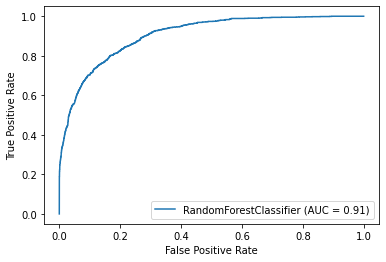

In [23]:
from sklearn.metrics import accuracy_score as acc

Two_cls_info=cluster_info[(cluster_info['Min_cls1_cnt_clusterwise']>0) & (cluster_info['Maj_cls0_cnt_clusterwise']>0)]
Two_cls_labels=Two_cls_info['Cluster label']
Two_cls_data=pd.DataFrame()
Two_cls_data.dropna
for i in Two_cls_labels:
  df=cluster_data[cluster_data['Cluster label']==i]
  Two_cls_data=Two_cls_data.append(df)

rf_clf =RandomForestClassifier(n_estimators=100, min_samples_split=20,
                                random_state=8)
rf_score=[]

X_train, X_test, y_train, y_test = train_test_split(Two_cls_data.iloc[:,1:len(Two_cls_data.columns)-3], Two_cls_data.iloc[:,len(Two_cls_data.columns)-3:len(Two_cls_data.columns)-2], test_size=0.2)

rf_clf.fit(X_train,y_train)
yrf_pred=rf_clf.predict(X_test)
y_true=y_test
rf_score.append(acc(y_true,yrf_pred))
print("mean of score for Random Forest Tree is:{:.3f}".format(mean(rf_score)) )

plot_roc_curve(rf_clf, X_test, y_test)
plt.show()


#Assign x from the unseen fold to its closest cluster and If this cluster has only instances of one class, assign to x that label

In [0]:

#If cluster has only one instance of class then label will be that class itself
cluster_info['new_label']=np.where(cluster_info['Maj_cls0_cnt_clusterwise']>cluster_info['Min_cls1_cnt_clusterwise'],0,1)

#Copying cluster_info to cluster_info_new and adding 'New_label' column with modified labels

cluster_info_new=cluster_info
n_clusters=7
#X_test_labels contain assignment of labels on base of elucdian distance from centroids
X_test_labels=np.zeros(X_test_pca.shape[0])
for i in range(len(X_test_pca)):
  min_dis=10000
  for j in range(n_clusters-2):
    if np.linalg.norm(X_test_pca[i]-kmeans.cluster_centers_[j])<min_dis:
      min_dis=np.linalg.norm(X_test_pca[i]-kmeans.cluster_centers_[j])
      X_test_labels[i]=cluster_info_new['new_label'][j]

curr_bin["Cluster lable"]=X_test_labels
curr_bin["Cluster lable"] = curr_bin["Cluster lable"].astype(int)



#Second method to find out cluster label of left out fold

In [25]:
def cluster_2_label(alpha):
    if alpha == 0:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 1:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 2:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 3:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 4:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 5:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 6:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 7:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])

predict=kmeans.fit_predict(X_test_pca)
labels_2 = predict
curr_bin['cluster_label']=labels_2
curr_bin['class_label']=curr_bin['cluster_label'].apply(cluster_2_label)

print(predict)
#curr_bin = curr_bin.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
print(pd.crosstab(curr_bin['salary_class'],curr_bin['class_label']))
print("Accuracy of defining class label: " ,acc(curr_bin['class_label'],curr_bin['salary_class']))
#curr_bin

[5 2 6 ... 4 1 1]
class_label      0    1
salary_class           
0             1610  862
1              664  120
Accuracy of defining class label:  0.5313267813267813


#DT and RF model with Leave one out approach, training with 9 bins and testing with rest

Scores for stratified Decision Tree are:
[0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368]
Scores for stratified Random Forest Tree are:
[0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368]
Average Accuracy for Decision Tree: 0.74 +/- 0.00
AverageAccuracy for RF Tree: 0.74 +/- 0.00
classification_report for Decision Tree is:
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      2053
         1.0       0.00      0.00      0.00       705

    accuracy                           0.74      2758
   macro avg       0.37      0.50      0.43      2758
weighted avg       0.55      0.74      0.64      2758

classification_report for Random Forest Tree is

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


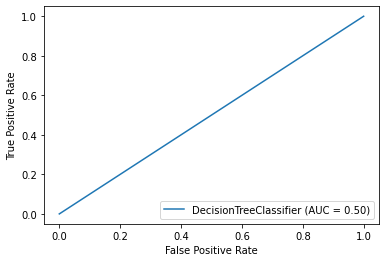

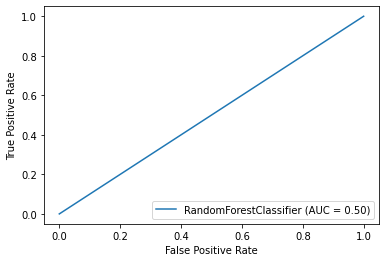

In [44]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score as acc
from sklearn.decomposition import PCA

#Separating o and 1 classes data
#Two_cls_data=Two_cls_data.drop(['Cluster label'], axis=1)
df_class0=Two_cls_data[Two_cls_data['salary_class']==0]
df_class1=Two_cls_data[Two_cls_data['salary_class']==1]

#Countig length of each class data

ln0=int(len(df_class0)/10)
ln1=int(len(df_class1)/10)

rf_clf =RandomForestClassifier(n_estimators=1000,max_depth=8,criterion='entropy', min_samples_split=20,
                                random_state=10)
dt_clf=DecisionTreeClassifier(min_samples_split=20,max_depth=8,
                                random_state=10)
new_rf_score=[]
new_dt_score=[]

init0=0
init1=0
ln0=int(len(df_class0)/10)
ln1=int(len(df_class1)/10)
for i in range(10):
    curr_bin=pd.concat([df_class0.iloc[init0:init0+ln0,:],df_class1.iloc[init1:init1+ln1,:]])
    curr_bin=pd.DataFrame(curr_bin)
    data1=pd.DataFrame(pd.concat([df_class0.iloc[0:init0,:],df_class1.iloc[0:init1,:]]))
    data2=pd.DataFrame(pd.concat([df_class0.iloc[init0+ln0:len(df_class0.index),:],df_class1.iloc[init0+ln0:len(df_class1.index),:]]))
    data_excp_curr_bin=pd.concat([data1,data2])
    init0+=ln0
    init1+=ln1


#Scaling and PCA for current bin
    X_test_bin=curr_bin.iloc[:,1:len(curr_bin.columns)-2]
    X_test_bin=sc.fit_transform(X_test_bin)
    X_test_bin_pca= pca.fit_transform(X_test_bin)
    X_train_bin=data_excp_curr_bin.iloc[:,1:len(data_excp_curr_bin.columns)-2]
    X_train=sc.fit_transform(X_train_bin)
    X_train_pca= pca.fit_transform(X_train_bin)
    X_test_bin=sc.fit_transform(X_test_bin)
    y_train=data_excp_curr_bin.iloc[:,len(data_excp_curr_bin.columns)-3:len(data_excp_curr_bin.columns)-2]
    y_test_bin=curr_bin.iloc[:,len(curr_bin.columns)-3:len(curr_bin.columns)-2]

#Fitting both model for current bin    
    dt_clf.fit(X_train_pca,y_train.values.ravel())
    rf_clf.fit(X_train_pca,y_train.values.ravel())

#predicting for testing
    yrf_pred=rf_clf.predict(X_test_bin_pca)
    ydt_pred=dt_clf.predict(X_test_bin_pca)
    y_true=y_test_bin
    new_dt_score.append(acc(y_true,ydt_pred))
    new_rf_score.append(acc(y_true,yrf_pred)) 

print("Scores for stratified Decision Tree are:")
print(new_dt_score)
print("Scores for stratified Random Forest Tree are:")
print(new_rf_score)

print("Average Accuracy for Decision Tree: %0.2f +/- %0.2f" % (mean(new_dt_score), np.std(new_dt_score)))
print("AverageAccuracy for RF Tree: %0.2f +/- %0.2f" % (mean(new_rf_score), np.std(new_rf_score)))


#Result
print("classification_report for Decision Tree is:")

print(classification_report(y_true, ydt_pred))

print("classification_report for Random Forest Tree is:")

print(classification_report(y_true, yrf_pred))

plot_roc_curve(dt_clf, X_test_bin_pca, y_test_bin.values.ravel())
plt.show()

plot_roc_curve(rf_clf,X_test_bin_pca, y_test_bin.values.ravel())
plt.show()

    

#Permutation on results and Accuracies metrics

In [45]:
#Decision Tree results:
print("Baseline Decision Tree method accuries:")
print(old_dt_scores['test_score'])

print("\n Baseline Decision Tree method accuries mean:")
print(mean(old_dt_scores['test_score']))

print("\n New method Decision Tree accuries:")
print(new_dt_score) 

print("\n New method Decision Tree accuries mean:")
print(mean(new_dt_score)) 

tobs=mean(new_dt_score)-mean(old_dt_scores['test_score'])

dt_concat = np.concatenate((old_dt_scores['test_score'],new_dt_score))

count=0
for i in range(2000):
  perm = np.random.permutation(dt_concat)
  pcurr = perm[:len(old_dt_scores['test_score'])]
  pnew = perm[:len(new_dt_score)]
  percfltmean=np.mean(pcurr)
  pernfltmean=np.mean(pnew)
  tperm=pernfltmean-percfltmean
  if tperm>tobs:
    count=count+1
p=count/2000
print("Decision Tree p-value :",p)



#Random Forest Tree results:
print("Baseline Random Forest Tree method accuries:")
print(old_rf_scores['test_score'])

print("\n Baseline Random Forest Tree method accuries mean:")
print(mean(old_rf_scores['test_score']))

print("\n New method Random Forest Tree accuries:")
print(new_rf_score)


print("\n New method Random Forest Tree accuries mean:")
print(mean(new_rf_score)) 

tobs=mean(new_rf_score)-mean(old_rf_scores['test_score'])

rf_concat = np.concatenate((old_rf_scores['test_score'],new_rf_score))

count=0
for i in range(2000):
  perm = np.random.permutation(rf_concat)
  pcurr = perm[:len(old_rf_scores['test_score'])]
  pnew = perm[:len(new_rf_score)]
  percfltmean=np.mean(pcurr)
  pernfltmean=np.mean(pnew)
  tperm=pernfltmean-percfltmean
  if tperm>tobs:
    count=count+1
p=count/2000
print("Random Forest Tree p-value :",p)


Baseline Decision Tree method accuries:
[0.83435583 0.82822086 0.8404908  0.82949309 0.83870968 0.82642089
 0.83717358 0.80798771 0.81259601 0.83563748]

 Baseline Decision Tree method accuries mean:
0.82910859178423

 New method Decision Tree accuries:
[0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368]

 New method Decision Tree accuries mean:
0.7443799854967368
Decision Tree p-value : 1.0
Baseline Random Forest Tree method accuries:
[0.80368098 0.79447853 0.8006135  0.80952381 0.80184332 0.79416283
 0.79723502 0.79569892 0.79262673 0.80337942]

 Baseline Random Forest Tree method accuries mean:
0.7993243052217919

 New method Random Forest Tree accuries:
[0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.7443799854967368, 0.74

#BoxPlot Comparison

[Text(0, 0.5, 'Accuracy'),
 Text(0.5, 0, 'new_dt_score'),
 Text(0.5, 1.0, 'new_dt_score')]

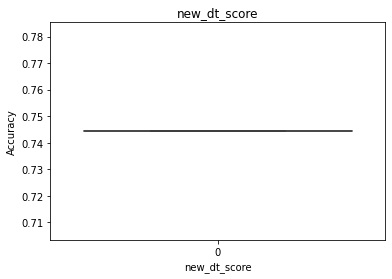

In [46]:
# make grouped boxplot

sns.boxplot(data= new_dt_score).set(title = 'new_dt_score', xlabel = 'new_dt_score', ylabel = 'Accuracy' )

[Text(0, 0.5, 'Accuracy'),
 Text(0.5, 0, 'new_rf_score'),
 Text(0.5, 1.0, 'new_rf_score')]

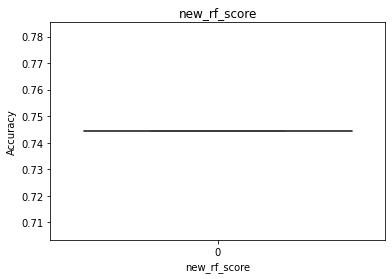

In [47]:

sns.boxplot(data= new_rf_score,dodge=True,fliersize=10).set(title = 'new_rf_score', xlabel = 'new_rf_score', ylabel = 'Accuracy' )

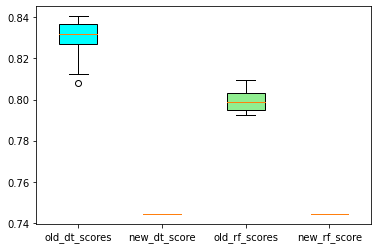

In [48]:
import matplotlib.pyplot as plt


box_plot_data=[old_dt_scores['test_score'],new_dt_score,old_rf_scores['test_score'],new_rf_score]
box=plt.boxplot(box_plot_data,vert=1,patch_artist=True,labels=['old_dt_scores','new_dt_score','old_rf_scores','new_rf_score'],
            )
 
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()